[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_4_AprendizajeAutomatico/notebook/Introduccion_Perceptron_P2.ipynb)

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Part 1: Datos

In [2]:
# Load data
iris = load_iris()
X = iris.data
Y = iris.target

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)
print("Class names:", iris.target_names)

Data: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Labels (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Class names: ['setosa' 'versicolor' 'virginica']


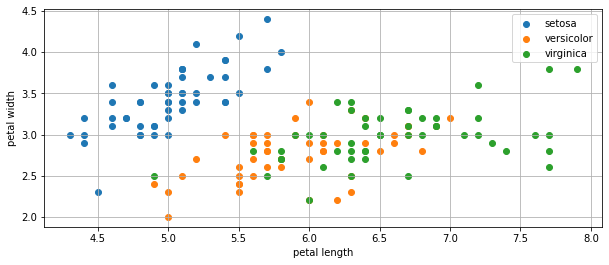

In [3]:
# Plot two features: petal length and petal width
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], label=iris.target_names[2])
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

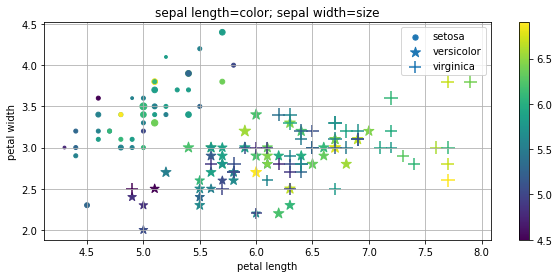

In [4]:
# == Q1: ==
# Idea alguna manera de visualizar y diferenciar las 4 variables
# usando una gráfica de sólo 2D. Muestra tu solución:
plt.figure(figsize=(10, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], c=X[Y==0, 2], s=80*X[Y==0, 3], marker='o', label=iris.target_names[0])
plt.scatter(X[Y==1, 0], X[Y==1, 1], c=X[Y==1, 2], s=80*X[Y==1, 3], marker='*', label=iris.target_names[1])
plt.scatter(X[Y==2, 0], X[Y==2, 1], c=X[Y==2, 2], s=80*X[Y==2, 3], marker='+', label=iris.target_names[2])
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.colorbar()
plt.title('sepal length=color; sepal width=size')
plt.grid(True)
plt.show()

In [5]:
# Let's keep two classes only, and two variables
X = X[:100, :2]
Y = Y[:100]

print("Data:", X.shape)
print(X[:10])
print("Labels", Y.shape)
print(Y)

Data: (100, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]
Labels (100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
# Split data into training + validation and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


# Part 2: Perceptron

In [7]:
# Define class linear (step) perceptron
class LPerceptron:
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
  
  #activation function  
  def activation(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      result = self.activation(x)
      Y.append(result)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=1, val_split=0.1):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split) #split train into train and val
    
    self.w = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train))
    accuracy[1] = accuracy_score(y_val, self.predict(x_val))
    #print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        y_hat = self.activation(x)
        err = y - y_hat
        self.w = self.w + lr * err * x  #LA
        self.b = self.b + lr * err      #LB
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train))
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val))
      #print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

In [ ]:
# == Q2: ==
# Explica qué sucede en las líneas comentadas como #LA y #LB: actualización de parámetros

# ¿Qué significa cada térmido de las ecuaciones?
# lr: tasa de aprendizaje (eta); err: differencia entre pronóstico y predicción;
# x: dato de entrada

# ¿Por qué contienen el térmido de la variable "err"?: es parte de la derivada

# ¿Por qué contienen como un térmido la variable de entrada "x"?: es par de la derivada

# ¿Cuántas iteraciones suceden en el loop interno del método fit?: tantas como
# número de datos de entrenamiento haya.

In [8]:
# Create a model and train it for 50 epochs
perceptron = LPerceptron()
acc_history = perceptron.fit(x_train, y_train, n_epochs=20, lr=0.001, val_split=0.1)
# Encuentra el mejor learning rate lr

In [9]:
# Making predictions on test data
y_test_hat = perceptron.predict(x_test)
print("Test acc:", accuracy_score(y_test_hat, y_test))

Test acc: 0.95


In [10]:
# Show the final values for the weights and bias
print("Weights:", perceptron.w)
print("bias:", perceptron.b)

Weights: [ 0.01595143 -0.05139932]
bias: -0.07700000000000005


In [12]:
# == Q3: ==
# Corre el experimento anterior 100 veces (quizás quieras comentar las impresiones parciales) y reporta
# el promedio +- desviación estándar obtenido en la última época de cada corrida.
# Debes reportar 3 promedios: para training, validation, y test sets
# ¿Notas algún cambio significativo?: No. Deberían ser estables.

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=30, lr=0.3, val_split=0.1)
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.9583 +- 0.0590
Validation:	 0.9487 +- 0.0920
Test:		 0.9365 +- 0.0977


In [13]:
# == Q4: ==
# Repite el experimento anterior pero ahora usando las 4 variables de los datos (en vez de sólo 2)
# ¿Hubo algún cambio significativo en los resultados obtenidos?
# ¿Por qué crees que fue esto?: Se integraro variables que ayudan a la separación de los datos

X = iris.data[:100]
Y = iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=30, lr=0.3, val_split=0.1)
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 1.0000 +- 0.0000
Validation:	 1.0000 +- 0.0000
Test:		 1.0000 +- 0.0000


In [14]:
# == Q5: ==
# Repite el experimento anterior pero ahora usando las 4 variables de las clases versicolor (1) y virginica (2)
# ¿Hubo algún cambio significativo en los resultados obtenidos?: Sí.
# ¿Por qué crees que fue esto?: Las clases son más difíciles de separar linealmente.
# ¿Por qué si modificamos los datos, seguimos usando las mismas etiquetas: Y = iris.target[:100]?
# Necesitamos etiquetas con valores 0 y 1.

X = iris.data[50:]
Y = iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = LPerceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test_hat, y_test)
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.8890 +- 0.0849
Validation:	 0.8675 +- 0.1412
Test:		 0.8515 +- 0.1031


# Part 3: Non-linear (sigmoid) Perceptron

In [15]:
# == Q6: ==
# Completa el siguiente código del perceptron no lineal (sigmoide)

In [16]:
# Define class perceptron
class Perceptron:
  #constructor
  def __init__ (self):
    self.W = None
    self.b = None
  
  #total neuron input
  def lin_sum(self, X):
    return np.dot(self.W, X) + self.b
  
  #activation (sigmoid)
  def sigmoid(self, s):
    return 1.0 / (1.0 + np.exp(-s))
  
  #derivative of activation (sigmoid)
  def d_sigmoid(self, s):
    return self.sigmoid(s) * (1.0 - self.sigmoid(s))
  
  #predict on data
  def predict(self, X):
    Y = []
    for x in X:
      s = self.lin_sum(x)
      y = self.sigmoid(s)
      Y.append(y)
    return np.array(Y)

  #train
  def fit(self, X, Y, n_epochs=1, lr=0.1, val_split=0.1):
    x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=val_split)
    
    self.W = np.random.rand(X.shape[1])
    self.b = 0.0
    
    accuracy = np.zeros((2,))
    accuracy[0] = accuracy_score(y_train, self.predict(x_train).round())
    accuracy[1] = accuracy_score(y_val, self.predict(x_val).round())
    #print(f"Epoch: {0:3d} -- acc: {accuracy[0]:6.4f}, acc_val: {accuracy[1]:6.4f}")
    
    accuracy = np.zeros((n_epochs, 2))
    for epoch in range(n_epochs): #loop through epochs
      for x, y in zip(x_train, y_train):  #loop through samples
        # Forward pass
        s = self.lin_sum(x)
        y_hat = self.sigmoid(s)
        # Backward pass
        err = y - y_hat
        self.W = self.W + lr * err * self.d_sigmoid(s) * x
        self.b = self.b + lr * err * self.d_sigmoid(s)
      accuracy[epoch, 0] = accuracy_score(y_train, self.predict(x_train).round())
      accuracy[epoch, 1] = accuracy_score(y_val, self.predict(x_val).round())
      #print(f"Epoch: {epoch+1:3d} -- acc: {accuracy[epoch, 0]:6.4f}, acc_val: {accuracy[epoch, 1]:6.4f}")
        
    return accuracy

In [17]:
# == Q7: ==
# Repite el experimento anterior usando las 4 variables de las clases versicolor (1) y virginica (2),
# pero ahora usando el Perceptron logístico
# ¿Hubo algún cambio significativo en los resultados obtenidos?: No. La mejora es marginal.
# ¿Por qué crees que fue esto?: Sigmoide ayuda un poco, pero los datos siguen siendo linealmente no separables.

X = iris.data[50:]
Y = iris.target[:100]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

ACC = np.zeros((100, 3))
for ind in range(100):
  perceptron = Perceptron()
  acc_history = perceptron.fit(x_train, y_train, n_epochs=50, lr=0.3, val_split=0.1)
  ACC[ind, 0], ACC[ind, 1] = acc_history[-1]
  y_test_hat = perceptron.predict(x_test)
  ACC[ind, 2] = accuracy_score(y_test, y_test_hat.round())
    
print(f"Training:\t {ACC[:, 0].mean():6.4f} +- {ACC[:, 0].std():6.4f}")
print(f"Validation:\t {ACC[:, 1].mean():6.4f} +- {ACC[:, 1].std():6.4f}")
print(f"Test:\t\t {ACC[:, 2].mean():6.4f} +- {ACC[:, 2].std():6.4f}")

Training:	 0.9001 +- 0.1158
Validation:	 0.8938 +- 0.1624
Test:		 0.8450 +- 0.1724


# Part 4: Sklearn Perceptron

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [29]:
from sklearn.linear_model import Perceptron
sk_perceptron = Perceptron(max_iter=50, eta0=0.03)
sk_perceptron.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.03,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
print(f"Training:\t {sk_perceptron.score(x_train, y_train):.4f}")
print(f"Validation:\t {sk_perceptron.score(x_val, y_val):.4f}")
print(f"Test:\t\t {sk_perceptron.score(x_test, y_test):.4f}")

Training:	 0.9167
Validation:	 0.7500
Test:		 0.8000
